# 互评作业1: 数据探索性分析与数据预处理
数据集：[GitHub Dataset](https://www.kaggle.com/datasets/nikhil25803/github-dataset?select=repository_data.csv)和[Movies Dataset from Pirated Sites](https://www.kaggle.com/datasets/arsalanrehman/movies-dataset-from-piracy-website)

仓库：https://github.com/ygjldd/DataPreprocess

数据保存在data文件夹下

# GitHub Dataset

该数据集有两个文件：github_dataset.csv和repository_data.csv，接下来依次进行处理

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('data/github_dataset.csv')

## 数据摘要和可视化

### 数据摘要

In [6]:
import pandas as pd

# 标称属性

nominal_columns = df.select_dtypes(include=['object']).columns
nominal_dfs = {}
for column in nominal_columns:
    temp_df = df[column].value_counts().rename('Count').reset_index()
    temp_df.columns = ['Value', 'Count']
    nominal_dfs[column] = temp_df

# 数值属性
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
numeric_df = pd.DataFrame(index=['min', '25%', '50%', '75%', 'max', 'missing values'])
for column in numeric_columns:
    numeric_df[column] = [df[column].min(), df[column].quantile(0.25), df[column].median(), df[column].quantile(0.75), df[column].max(), df[column].isnull().sum()]

for column, nominal_df in nominal_dfs.items():
    print(f"标称属性：{column}")
    display(nominal_df)
print("数值属性")
display(numeric_df)

标称属性：repositories


,Value,Count
0,aloisdeniel/dart-opencage-geocoder,2
1,carloscuesta/n26-github-actions-demo,2
2,vasu-1/GithubBotApp,2
3,lukefire5156/REMOTE-EDUCATION-APP---EMAGISTER,2
4,justinshenk/deepemotion,2
...,...,...
967,ethereum/blake2b-py,1
968,openfoodfacts/folksonomy_mobile_experiment,1
969,WhiteHouse/buildmanager,1
970,torvalds/test-tlb,1


标称属性：language


,Value,Count
0,JavaScript,253
1,Python,155
2,HTML,72
3,Java,44
4,CSS,37
5,TypeScript,37
6,Dart,36
7,Jupyter Notebook,29
8,C++,29
9,Ruby,28


数值属性


,stars_count,forks_count,issues_count,pull_requests,contributors
min,0.00,0.00,1.0,0.0,0.0
25%,1.00,1.00,1.0,0.0,0.0
50%,12.00,6.00,2.0,0.0,2.0
75%,65.25,38.25,6.0,2.0,4.0
max,995.00,973.00,612.0,567.0,658.0
missing values,0.00,0.00,0.0,0.0,0.0


### 数据可视化

对标称属性绘制直方图，数值属性绘制直方图和盒图

其中，为了可视化效果，对于每种标称属性，仅保留出现频率最高的前20个数据

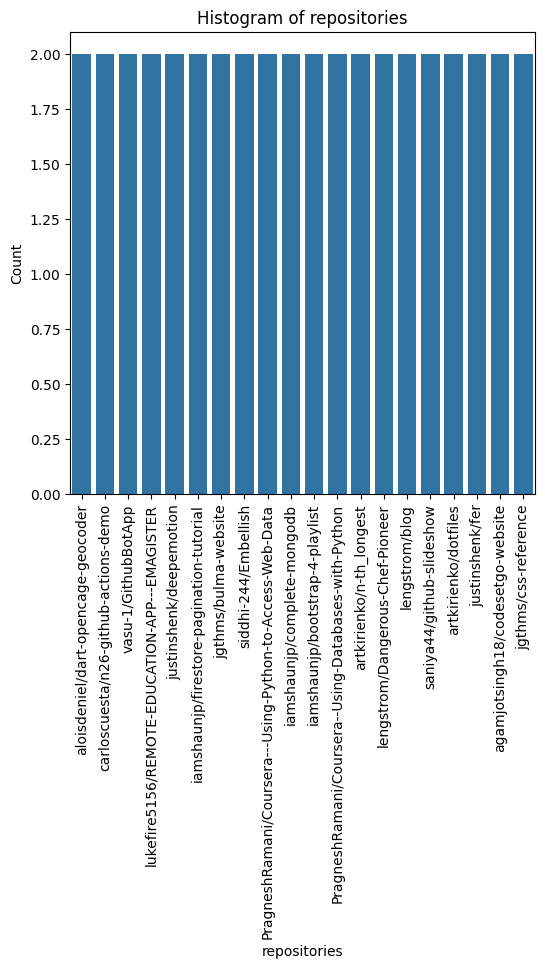

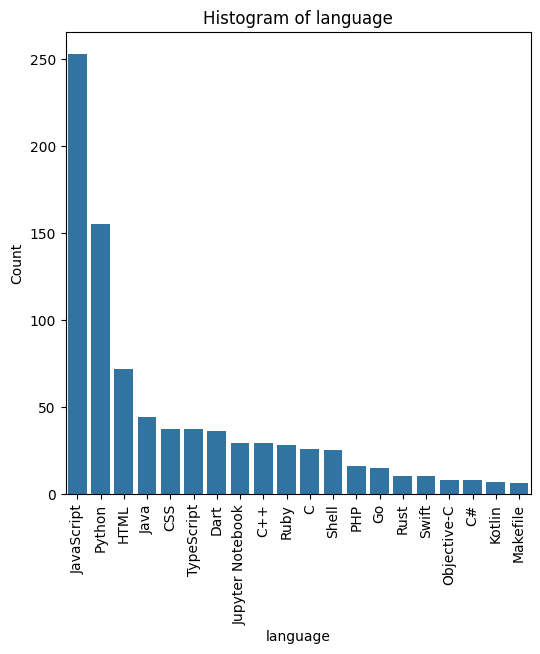

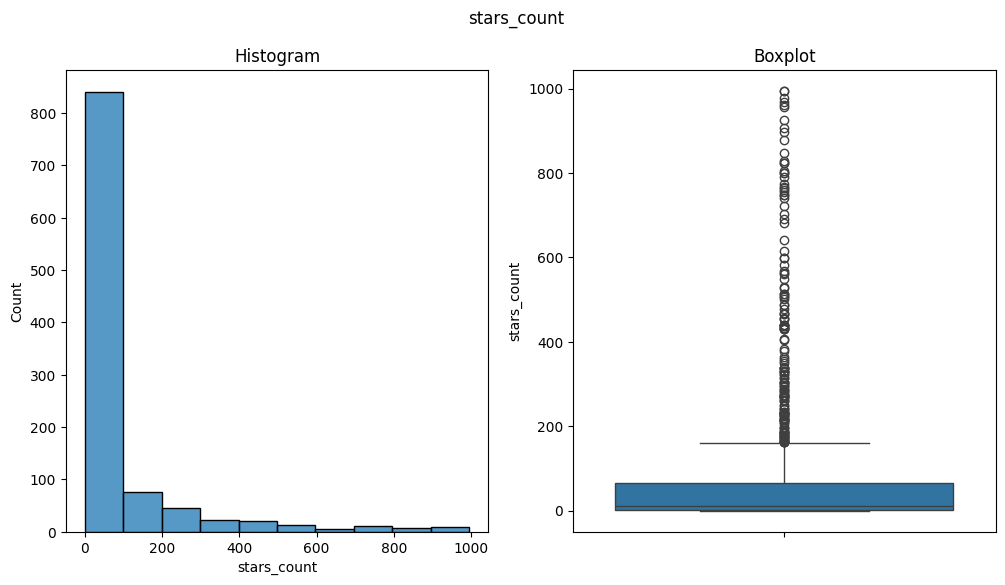

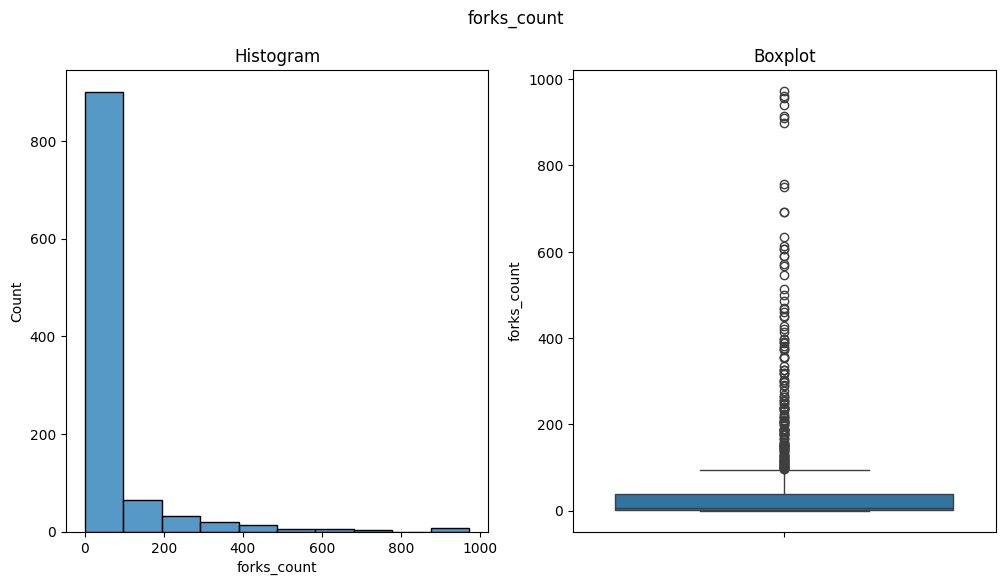

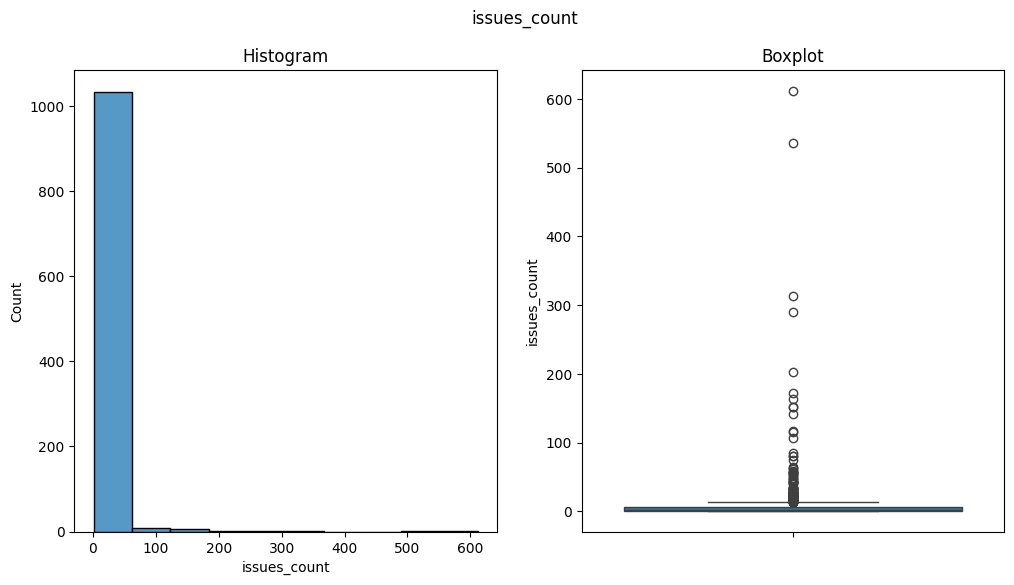

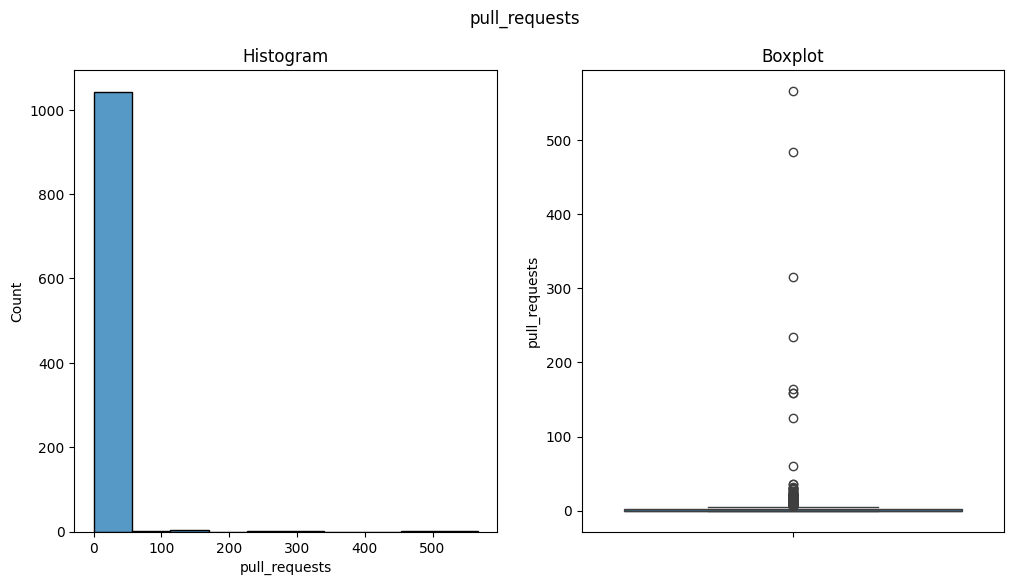

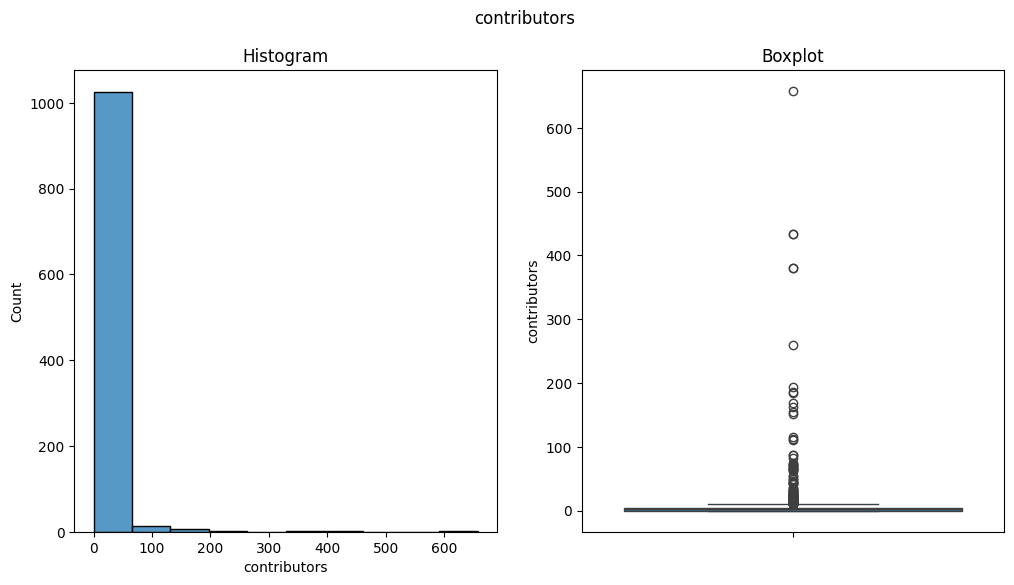

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

nominal_df = df.select_dtypes(include=['object']).columns

for column, nominal_df in nominal_dfs.items():
    plt.figure(figsize=(6, 6))
    top_20_nominal_df = nominal_df.head(20)
    sns.barplot(x='Value', y='Count', data=top_20_nominal_df)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column[:20])
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()



# 数值属性
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

for column in numeric_columns:
    plt.figure(figsize=(12, 6))
    
    # 直方图
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], bins=10)
    plt.title('Histogram')
    
    # 盒图
    plt.subplot(1, 2, 2)
    sns.boxplot(df[column])
    plt.title('Boxplot')
    
    plt.suptitle(column)
    plt.show()

根据可视化结果，可以发现数值属性的分布都很集中

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/repository_data.csv')

## 数据摘要和可视化

### 数据摘要

In [3]:
import pandas as pd

# 标称属性

nominal_columns = df.select_dtypes(include=['object']).columns
nominal_dfs = {}
for column in nominal_columns:
    temp_df = df[column].value_counts().rename('Count').reset_index()
    temp_df.columns = ['Value', 'Count']
    nominal_dfs[column] = temp_df

# 数值属性
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
numeric_df = pd.DataFrame(index=['min', '25%', '50%', '75%', 'max', 'missing values'])
for column in numeric_columns:
    numeric_df[column] = [df[column].min(), df[column].quantile(0.25), df[column].median(), df[column].quantile(0.75), df[column].max(), df[column].isnull().sum()]

for column, nominal_df in nominal_dfs.items():
    print(f"标称属性：{column}")
    display(nominal_df)
print("数值属性")
display(numeric_df)

标称属性：name


,Value,Count
0,dotfiles,5590
1,blog,2038
2,docs,1350
3,website,1163
4,scripts,649
...,...,...
2410857,check_dnssec_expiry,1
2410858,Cyber-Security-Scripts,1
2410859,Kotlin-JDA,1
2410860,phpunit-test-reporter,1


标称属性：primary_language


,Value,Count
0,JavaScript,451954
1,Python,451473
2,Java,202394
3,C++,150066
4,PHP,116058
...,...,...
492,Opal,1
493,TI Program,1
494,Rouge,1
495,Ox,1


标称属性：languages_used


,Value,Count
0,['Python'],257679
1,['JavaScript'],157741
2,['Java'],117624
3,['C#'],60299
4,['PHP'],56333
...,...,...
328143,"['Solidity', 'Python', 'Jupyter Notebook', 'Sh...",1
328144,"['JavaScript', 'TypeScript', 'Makefile', 'Less...",1
328145,"['C#', 'HTML', 'SCSS', 'CSS', 'C', 'C++']",1
328146,"['Smarty', 'Makefile', 'Shell', 'BitBake', 'St...",1


标称属性：created_at


,Value,Count
0,2017-06-05T20:53:54Z,10
1,2017-06-05T20:53:58Z,9
2,2014-01-17T08:00:09Z,8
3,2015-12-02T08:00:06Z,7
4,2010-06-10T19:21:23Z,7
...,...,...
2837003,2017-08-21T11:35:16Z,1
2837004,2017-08-09T00:50:43Z,1
2837005,2017-10-07T13:05:26Z,1
2837006,2017-08-31T15:39:04Z,1


标称属性：licence


,Value,Count
0,MIT License,784251
1,Apache License 2.0,210698
2,Other,167987
3,GNU General Public License v3.0,159443
4,"BSD 3-Clause ""New"" or ""Revised"" License",47078
5,GNU General Public License v2.0,43297
6,GNU Affero General Public License v3.0,21554
7,"BSD 2-Clause ""Simplified"" License",16819
8,The Unlicense,14400
9,GNU Lesser General Public License v3.0,14002


数值属性


,stars_count,forks_count,watchers,pull_requests,commit_count
min,2.0,0.0,0.0,0.0,1.0
25%,7.0,1.0,2.0,0.0,9.0
50%,12.0,4.0,3.0,1.0,27.0
75%,30.0,11.0,6.0,6.0,89.0
max,359805.0,242208.0,9544.0,301585.0,4314502.0
missing values,0.0,0.0,0.0,0.0,1921.0


### 数据可视化

对标称属性绘制直方图，数值属性绘制直方图和盒图

其中，为了可视化效果，对于每种标称属性，仅保留出现频率最高的前20个数据

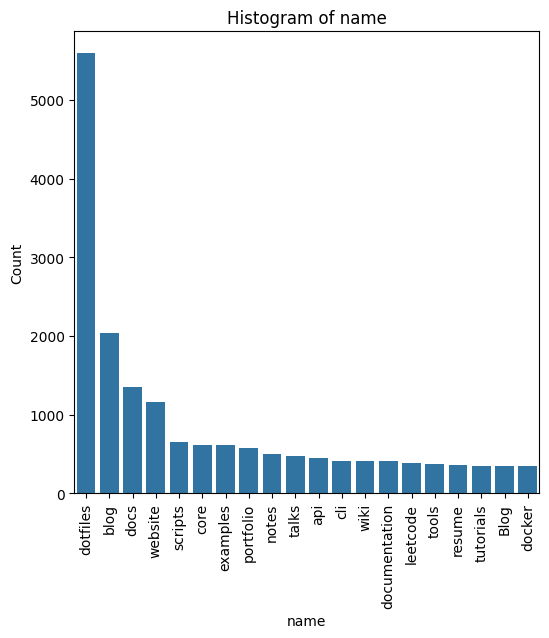

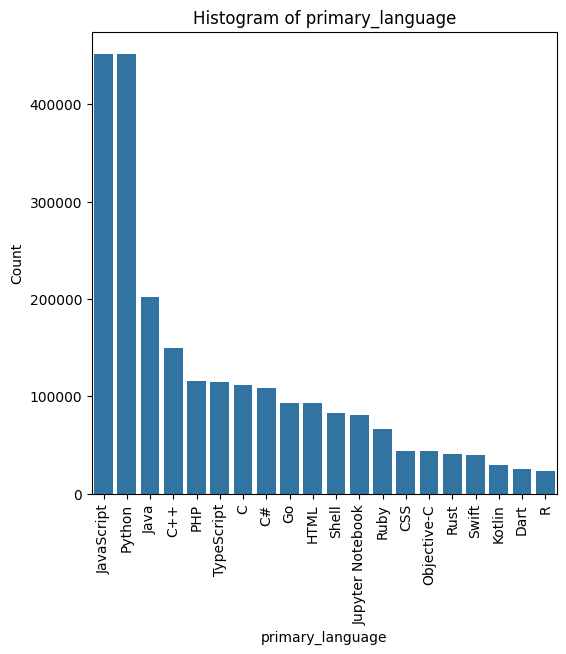

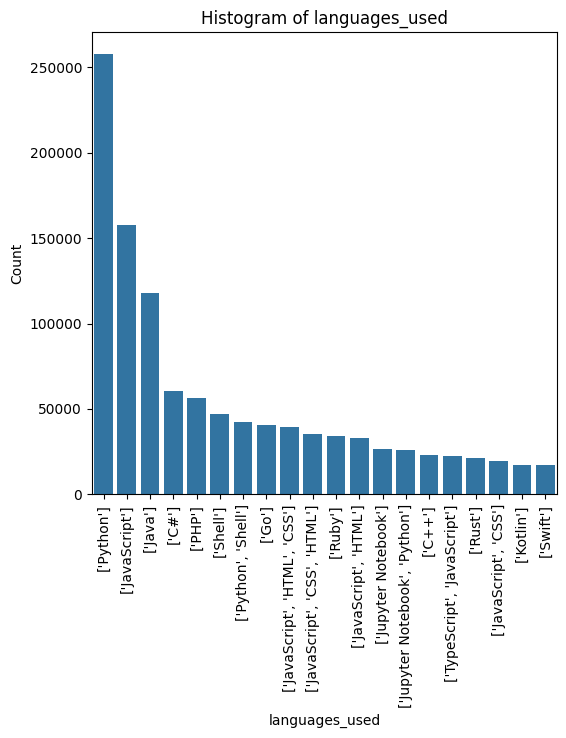

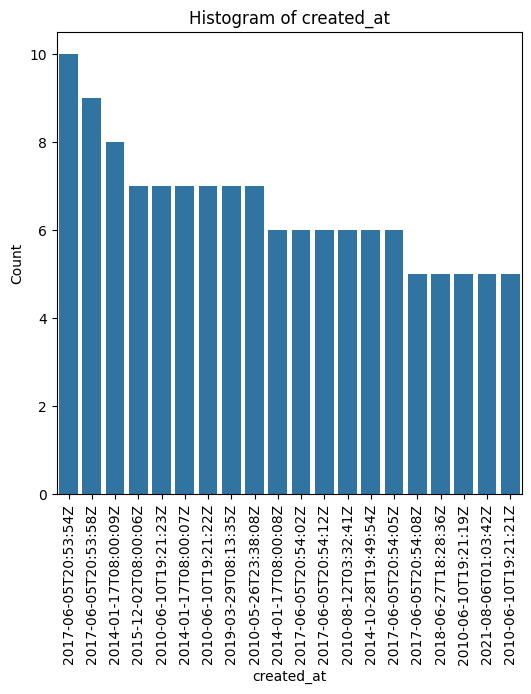

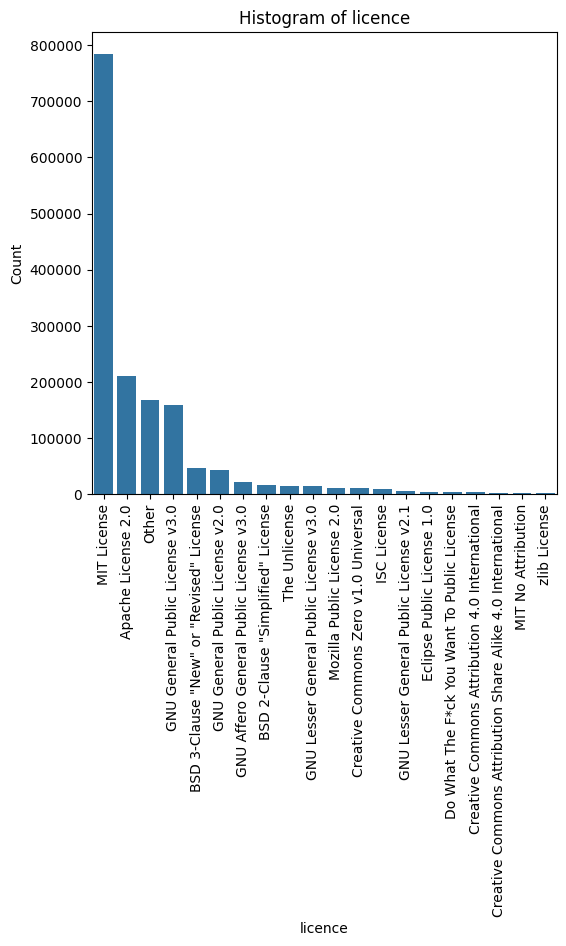

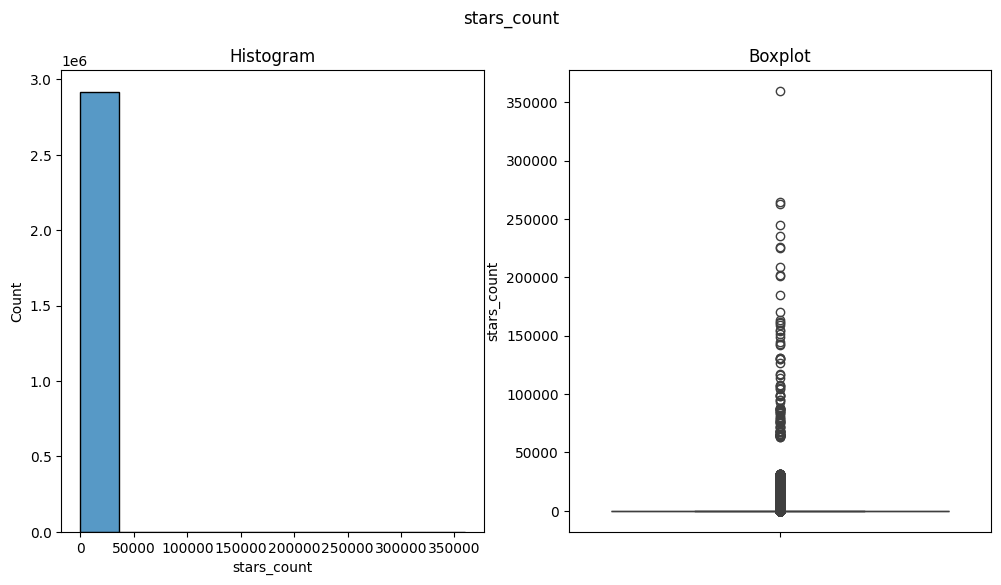

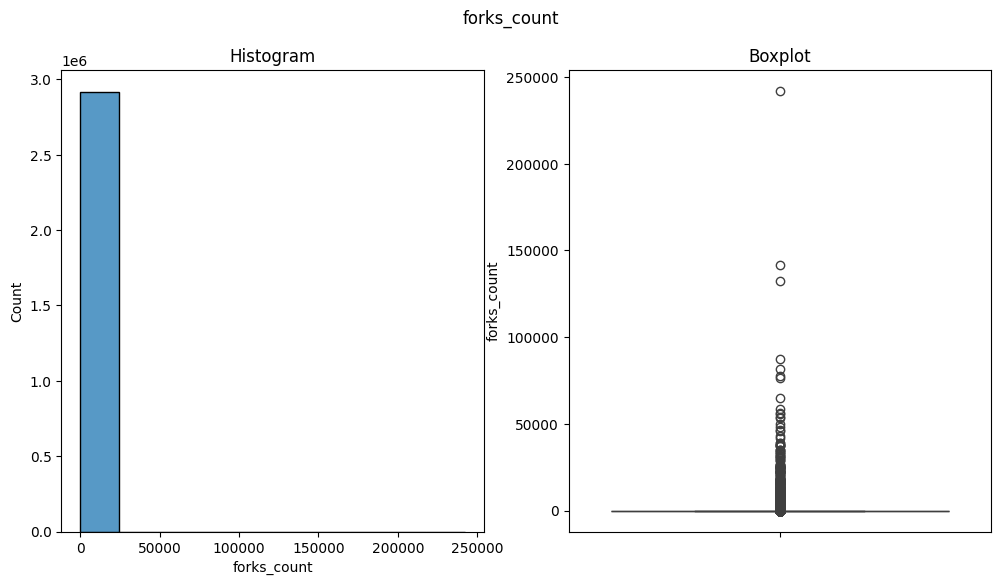

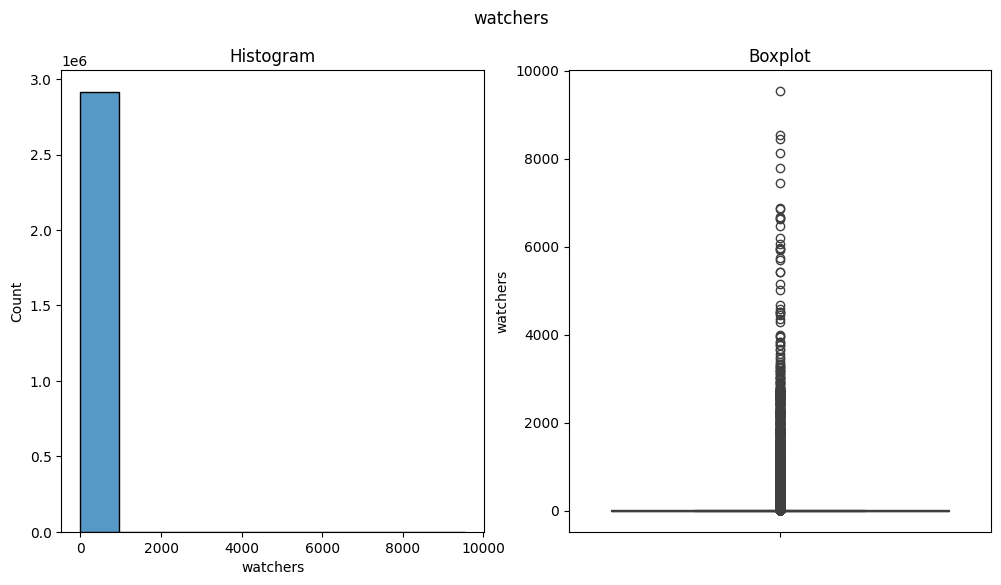

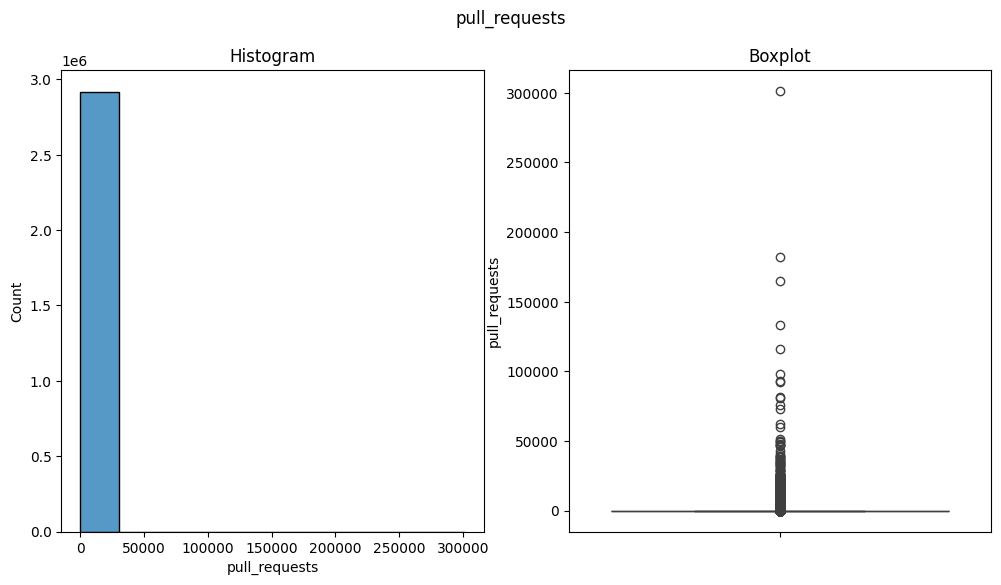

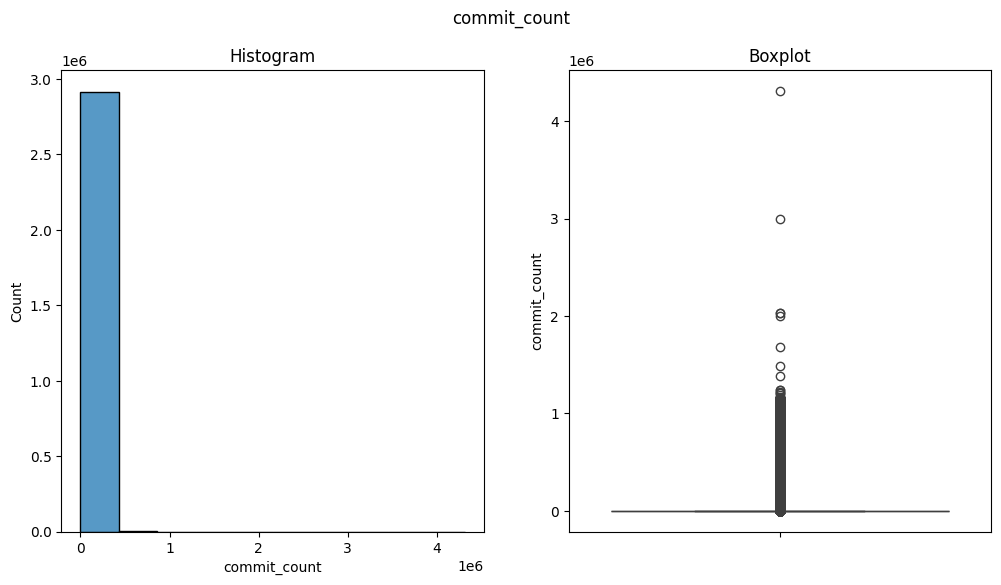

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

nominal_df = df.select_dtypes(include=['object']).columns

for column, nominal_df in nominal_dfs.items():
    plt.figure(figsize=(6, 6))
    top_20_nominal_df = nominal_df.head(20)
    sns.barplot(x='Value', y='Count', data=top_20_nominal_df)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column[:20])
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()



# 数值属性
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

for column in numeric_columns:
    plt.figure(figsize=(12, 6))
    
    # 直方图
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], bins=10)
    plt.title('Histogram')
    
    # 盒图
    plt.subplot(1, 2, 2)
    sns.boxplot(df[column])
    plt.title('Boxplot')
    
    plt.suptitle(column)
    plt.show()

根据可视化结果，可以发现各属性的分布都很集中

## 数据缺失的处理

### 缺失数据及缺失的原因

根据数据摘要可知，github_dataset.csv的数值属性无缺失值，repository_data.csv的属性数值中仅commit_count列存在缺失值，故以下仅对repository_data.csv的commit_count列进行缺失数据分析和处理。

推测数据缺失的原因为收集数据时的遗漏

#### 将缺失部分剔除

In [10]:
processed_df = df.dropna()

##### 对比新旧数据集的差异

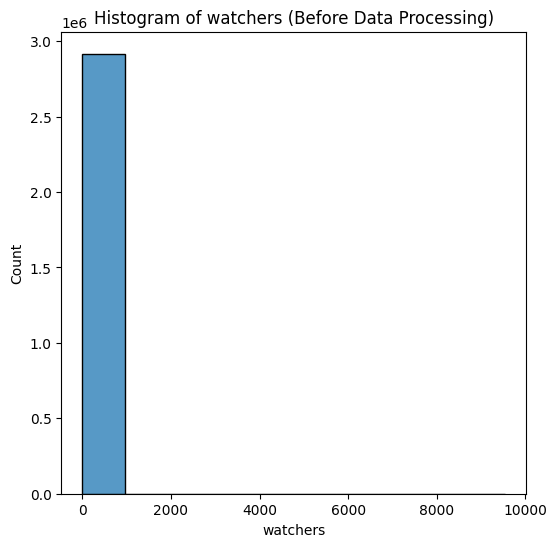

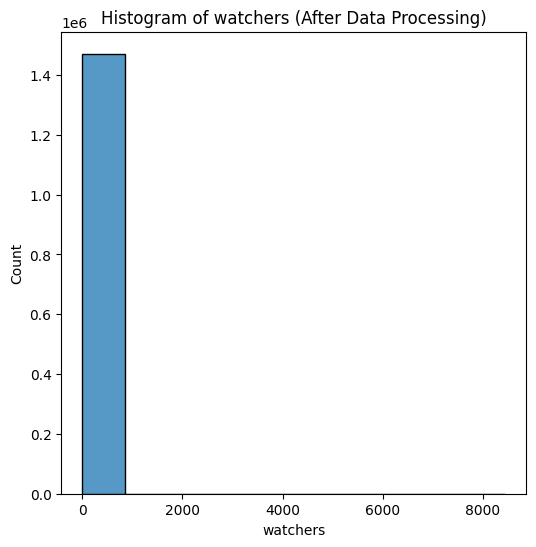

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

name = 'watchers'

plt.figure(figsize=(6, 6))
sns.histplot(df[name], bins=10)
plt.title(f'Histogram of {name} (Before Data Processing)')
plt.xlabel(name)
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(6, 6))
sns.histplot(processed_df[name], bins=10)
plt.title(f'Histogram of {name} (After Data Processing)')
plt.xlabel(name)
plt.ylabel('Count')
plt.show()


根据数据可视化结果，可以发现处理缺失值前后数据集分布范围变小，最大值变小，说明watchers数很大的数据，commit_count容易缺失。

#### 用最高频率值来填补缺失值

In [18]:
processed_df = df.fillna(df.mode().iloc[0])

##### 对比新旧数据集的差异

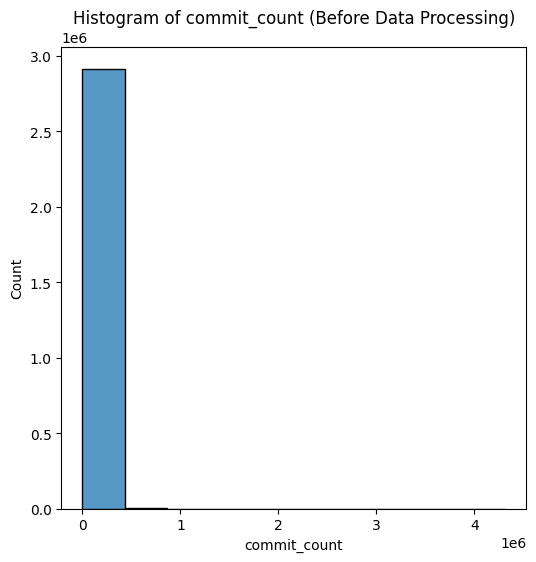

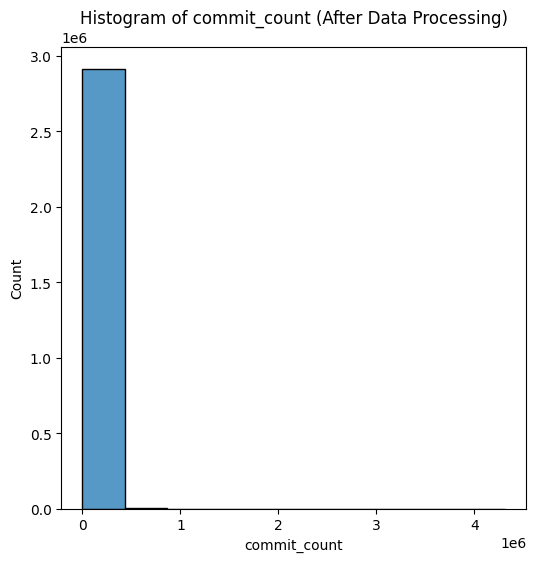

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

name = 'commit_count'

plt.figure(figsize=(6, 6))
sns.histplot(df[name], bins=10)
plt.title(f'Histogram of {name} (Before Data Processing)')
plt.xlabel(name)
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(6, 6))
sns.histplot(processed_df[name], bins=10)
plt.title(f'Histogram of {name} (After Data Processing)')
plt.xlabel(name)
plt.ylabel('Count')
plt.show()


根据可视化结果，由于commit_count列的数据分布非常集中，故缺失处理前后该列的分布基本不变

#### 通过属性的相关关系来填补缺失值

计算各列之间的相似度，依次使用相似度由高到低的其他列进行线性回归从而补全缺失数据

In [21]:
from sklearn.linear_model import LinearRegression
numeric_df = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_df.corr()
numeric_columns_with_missing = numeric_df.columns[numeric_df.isnull().any()].tolist()

for column in numeric_columns_with_missing:
    correlated_columns = correlation_matrix[column].sort_values(ascending=False).index[1:]
    
    for correlated_column in correlated_columns:
        if numeric_df[column].isnull().sum() == 0:
            break
        model = LinearRegression()
    
        train_data = numeric_df[numeric_df[column].notnull() & numeric_df[correlated_column].notnull()]
        model.fit(train_data[[correlated_column]], train_data[column])
        
        missing_data = numeric_df[numeric_df[column].isnull() & numeric_df[correlated_column].notnull()]
        
        if missing_data.empty: continue
        
        predictions = model.predict(missing_data[[correlated_column]])
        numeric_df.loc[numeric_df[column].isnull(), column] = predictions
processed_df = pd.concat([df.drop(numeric_df.columns, axis=1), numeric_df], axis=1)

##### 对比新旧数据集的差异

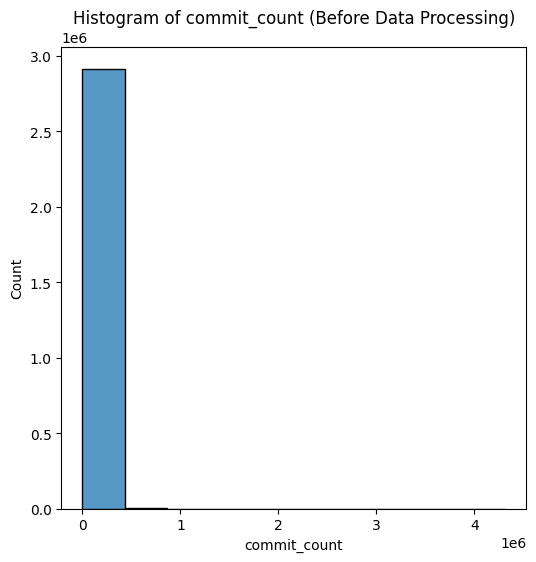

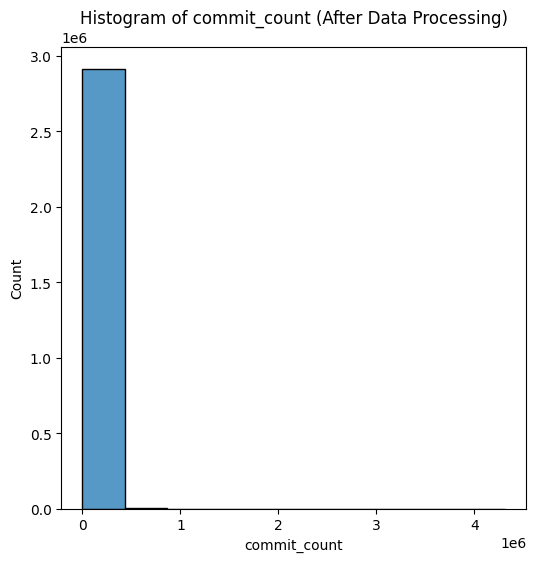

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

name = 'commit_count'

plt.figure(figsize=(6, 6))
sns.histplot(df[name], bins=10)
plt.title(f'Histogram of {name} (Before Data Processing)')
plt.xlabel(name)
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(6, 6))
sns.histplot(processed_df[name], bins=10)
plt.title(f'Histogram of {name} (After Data Processing)')
plt.xlabel(name)
plt.ylabel('Count')
plt.show()


根据可视化结果，由于commit_count列的数据分布非常集中，故缺失处理前后该列的分布基本不变

#### 通过数据对象之间的相似性来填补缺失值

使用余弦相似度计算数据缺失行与非缺失行中'commit_count'列之外的各列的余弦相似度，使用与缺失数据的对象相似度最高的前5个对象的'commit_count'进行填充

In [3]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

numeric_df = df.select_dtypes(include=['int64', 'float64'])
missing_rows = numeric_df[numeric_df.isnull().any(axis=1)]
non_missing_rows = numeric_df.dropna()
missing_rows_non_nan = missing_rows.drop('commit_count', axis=1)
non_missing_rows_non_nan = non_missing_rows.drop('commit_count', axis=1)

similarity_scores = cosine_similarity(missing_rows_non_nan, non_missing_rows_non_nan)


In [ ]:
missing_indices = missing_rows.index
non_missing_indices = non_missing_rows.index

top_k_indices = np.argsort(similarity_scores)[:, -5:]



In [9]:
for i in range(len(top_k_indices)):
    top_k_rows = non_missing_rows.iloc[top_k_indices[i]]
    average_values = top_k_rows.mean()
    missing_index = missing_indices[i]
    numeric_df.loc[missing_index, 'commit_count'] = average_values['commit_count']
processed_df = pd.concat([df.drop(numeric_df.columns, axis=1), numeric_df], axis=1)

##### 对比新旧数据集的差异

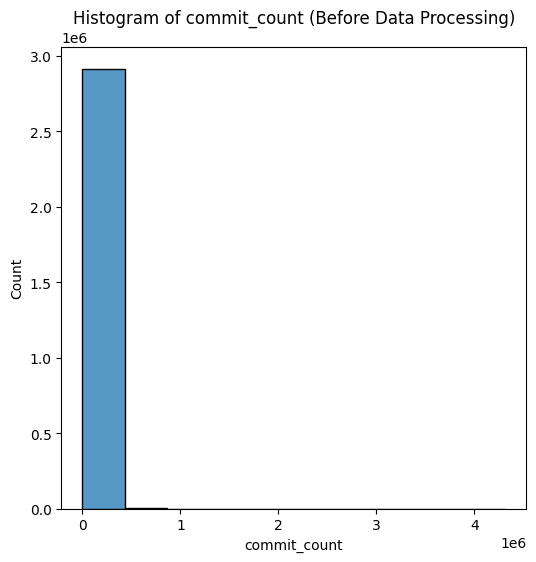

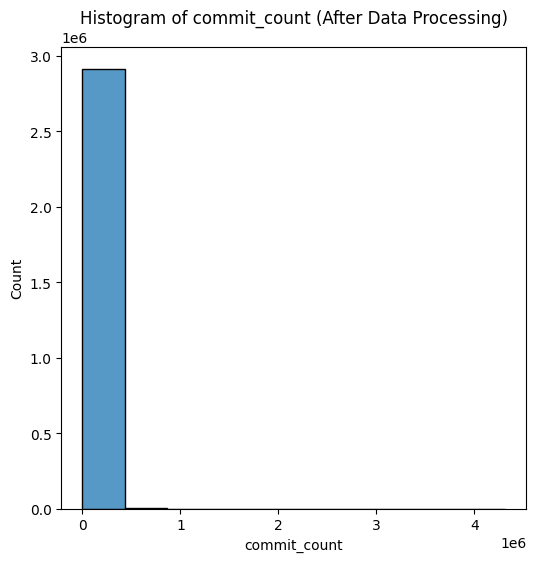

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

name = 'commit_count'

plt.figure(figsize=(6, 6))
sns.histplot(df[name], bins=10)
plt.title(f'Histogram of {name} (Before Data Processing)')
plt.xlabel(name)
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(6, 6))
sns.histplot(processed_df[name], bins=10)
plt.title(f'Histogram of {name} (After Data Processing)')
plt.xlabel(name)
plt.ylabel('Count')
plt.show()


根据可视化结果，由于commit_count列的数据分布非常集中，故缺失处理前后该列的分布基本不变

# Movies Dataset from Pirated Sites 数据集

In [2]:
import pandas as pd
df = pd.read_csv('data/movies_dataset.csv')

将使用千分位分隔符的数值属性转换为浮点型数值属性

In [7]:
df['views'] = df['views'].str.replace(',', '').astype(float)
df['downloads'] = df['downloads'].str.replace(',', '').astype(float)

将run_time列转化为分钟数

In [13]:
import re

def convert_to_minutes(time_str):
    hours = 0
    minutes = 0
    
    # Extract hours and minutes using regular expressions
    hours_match = re.search(r'(\d+)h', time_str)
    minutes_match = re.search(r'(\d+)min', time_str)
    
    if hours_match:
        hours = int(hours_match.group(1))
    if minutes_match:
        minutes = int(minutes_match.group(1))
    
    # Convert hours and minutes to minutes
    total_minutes = hours * 60 + minutes
    
    return total_minutes

df['run_time'] = df['run_time'].astype(str).apply(convert_to_minutes)


丢弃Unnamed: 0列（即原始数据中的索引列）

In [23]:
df = df.drop("Unnamed: 0", axis=1)


## 数据摘要和可视化

### 数据摘要

In [24]:
import pandas as pd

# 标称属性

nominal_columns = df.select_dtypes(include=['object']).columns
nominal_dfs = {}
for column in nominal_columns:
    temp_df = df[column].value_counts().rename('Count').reset_index()
    temp_df.columns = ['Value', 'Count']
    nominal_dfs[column] = temp_df

# 数值属性
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
numeric_df = pd.DataFrame(index=['min', '25%', '50%', '75%', 'max', 'missing values'])
for column in numeric_columns:
    numeric_df[column] = [df[column].min(), df[column].quantile(0.25), df[column].median(), df[column].quantile(0.75), df[column].max(), df[column].isnull().sum()]

for column, nominal_df in nominal_dfs.items():
    print(f"标称属性：{column}")
    display(nominal_df)
print("数值属性")
display(numeric_df)

标称属性：appropriate_for


,Value,Count
0,R,4384
1,Not Rated,2142
2,PG-13,1968
3,PG,886
4,TV-14,694
5,TV-MA,406
6,G,152
7,Unrated,132
8,TV-PG,115
9,TV-G,99


标称属性：director


,Value,Count
0,Venky Atluri,405
1,Simone Stock,403
2,Xavier Manrique,403
3,Neil Jordan,205
4,John Swab,205
...,...,...
9667,Marilyn Edmond,1
9668,Hannah Pearl Utt,1
9669,Devin Adair,1
9670,Rajath Ravishankar,1


标称属性：industry


,Value,Count
0,Hollywood / English,14649
1,Bollywood / Indian,2645
2,Tollywood,1172
3,Anime / Kids,1049
4,Wrestling,433
5,Punjabi,332
6,Stage shows,129
7,Pakistani,92
8,Dub / Dual Audio,45
9,3D Movies,1


标称属性：language


,Value,Count
0,English,12657
1,Hindi,2558
2,"English,Spanish",391
3,Punjabi,310
4,"English,Hindi",304
...,...,...
1162,"Urdu,Punjabi,English",1
1163,"English,Telugu",1
1164,"English,Italian,Swedish",1
1165,"Maltese,English",1


标称属性：posted_date


,Value,Count
0,"13 Feb, 2023",812
1,"15 Feb, 2023",607
2,"20 Feb, 2023",607
3,"10 Feb, 2023",485
4,"16 Feb, 2023",406
...,...,...
4118,"12 Feb, 1982",1
4119,"29 Aug, 1981",1
4120,"14 Aug, 1981",1
4121,"30 Jul, 1981",1


标称属性：release_date


,Value,Count
0,Jan 01 1970,962
1,Feb 03 2023,616
2,Feb 17 2023,607
3,Feb 10 2023,410
4,Feb 11 2023,402
...,...,...
4881,Aug 25 1972,1
4882,Dec 13 1971,1
4883,Jul 26 1971,1
4884,Jun 30 1971,1


标称属性：storyline


,Value,Count
0,It follows Kara Robinson as she survives an ab...,402
1,The life of a young man and his struggles agai...,402
2,Follows\r\n a New York City family hiding out ...,402
3,Doc\r\n facilitates a fragile truce between th...,202
4,"A\r\n young, gay Black man, rejected by his mo...",202
...,...,...
15743,"Wyatt, a cynical narcoleptic who lives in a fl...",1
15744,After being arrested for the murder of a white...,1
15745,A fisherman contends with an ocean-borne outbr...,1
15746,A suicide bomber loses his memory and has a bo...,1


标称属性：title


,Value,Count
0,The Girl Who Escaped: The Kara Robinson Story,402
1,Vaathi,402
2,Who Invited Charlie?,402
3,Little Dixie,202
4,The Inspection,202
...,...,...
16567,You Yesterday,1
16568,Good Sam,1
16569,Chasing Bullitt,1
16570,The Aspern Papers,1


标称属性：writer


,Value,Count
0,Nicholas Schutt,403
1,Venky Atluri,402
2,Haley Harris,402
3,John Swab,205
4,Bess Wohl,202
...,...,...
13598,Camille Thomasson,1
13599,"Jane Green, Ilene Rosenzweig",1
13600,"Joyce Smith, Grant Nieporte",1
13601,"Anoop Wadhwa, Writer Screenplay, Rohit Rana",1


数值属性


,IMDb-rating,downloads,id,run_time,views
min,1.1,0.0,1.00,0.0,667.0
25%,4.8,855.5,96122.25,0.0,7571.5
50%,5.7,2716.0,264457.50,0.0,15222.0
75%,6.6,10070.0,354561.25,0.0,36571.0
max,9.9,391272.0,372092.00,271.0,1638533.0
missing values,841.0,1.0,0.00,0.0,1.0


### 数据可视化

对标称属性绘制直方图，数值属性绘制直方图和盒图

其中，为了可视化效果，对于每种标称属性，仅保留出现频率最高的前20个数据

/tmp/ipykernel_2727925/1260404325.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_20_nominal_df['Value'] = top_20_nominal_df['Value'].str.slice(0, 20)


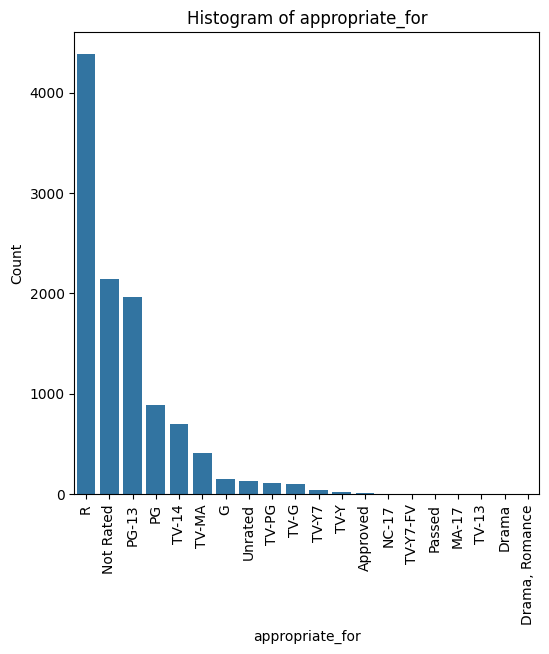

/tmp/ipykernel_2727925/1260404325.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_20_nominal_df['Value'] = top_20_nominal_df['Value'].str.slice(0, 20)


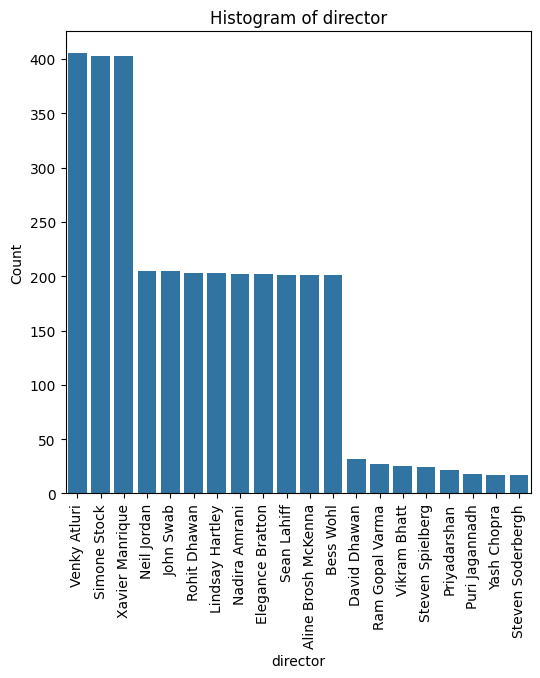

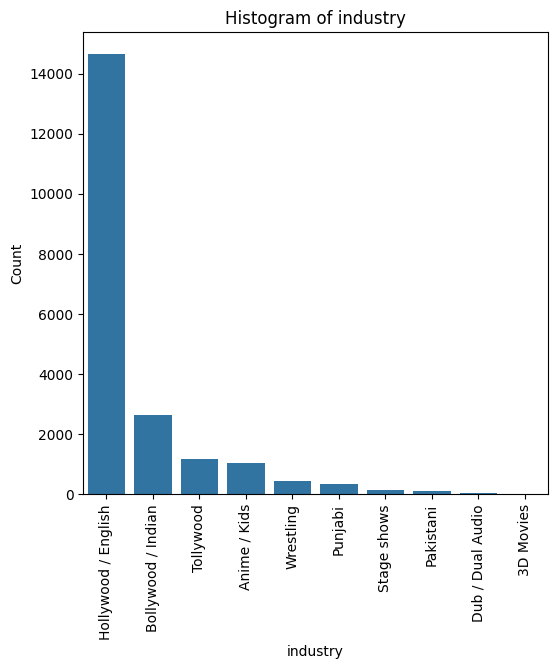

/tmp/ipykernel_2727925/1260404325.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_20_nominal_df['Value'] = top_20_nominal_df['Value'].str.slice(0, 20)


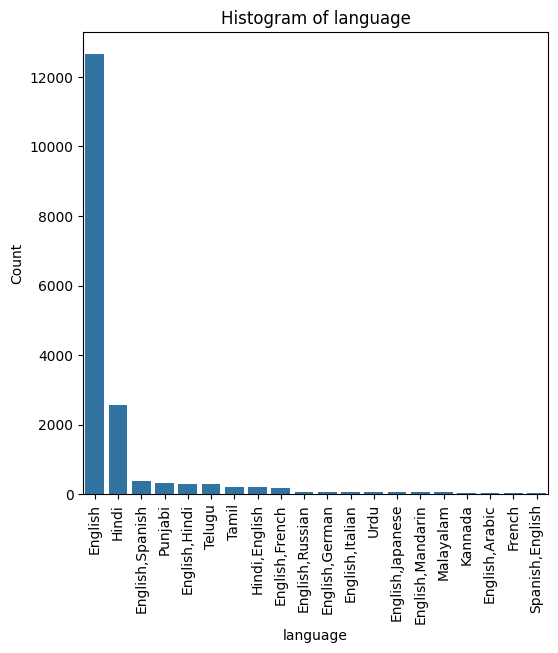

/tmp/ipykernel_2727925/1260404325.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_20_nominal_df['Value'] = top_20_nominal_df['Value'].str.slice(0, 20)


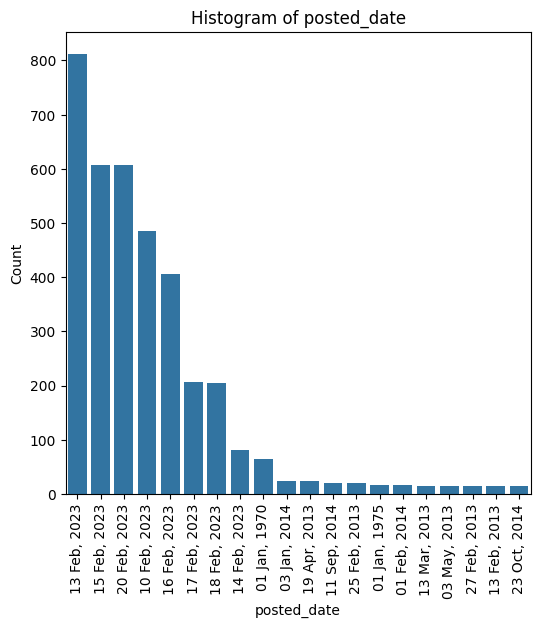

/tmp/ipykernel_2727925/1260404325.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_20_nominal_df['Value'] = top_20_nominal_df['Value'].str.slice(0, 20)


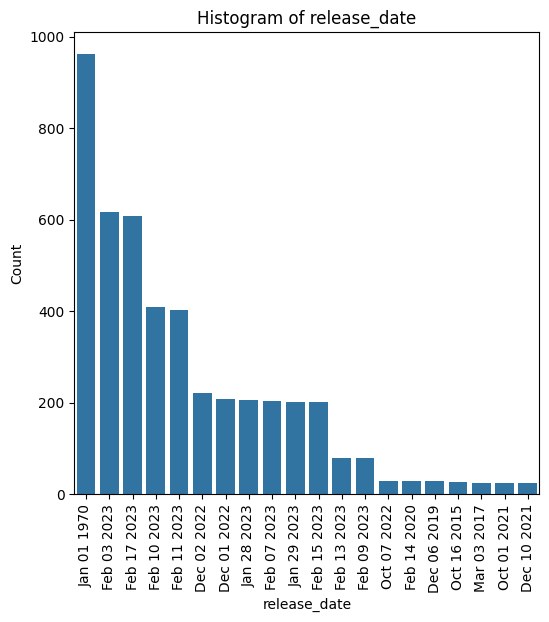

/tmp/ipykernel_2727925/1260404325.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_20_nominal_df['Value'] = top_20_nominal_df['Value'].str.slice(0, 20)
) missing from current font.thers/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


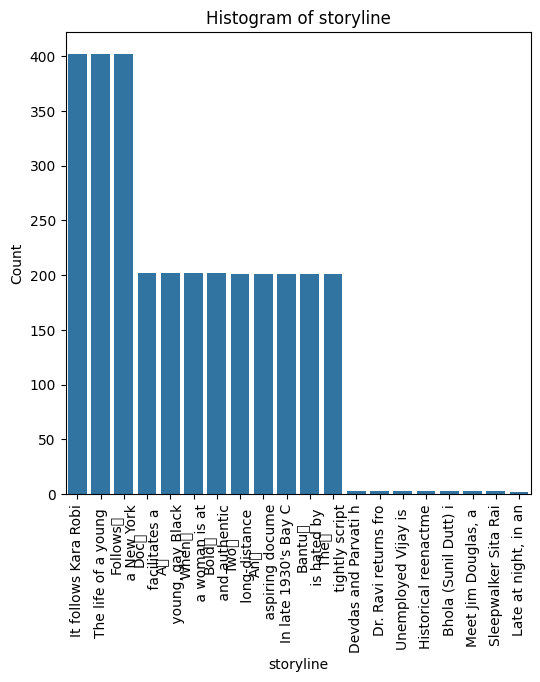

/tmp/ipykernel_2727925/1260404325.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_20_nominal_df['Value'] = top_20_nominal_df['Value'].str.slice(0, 20)


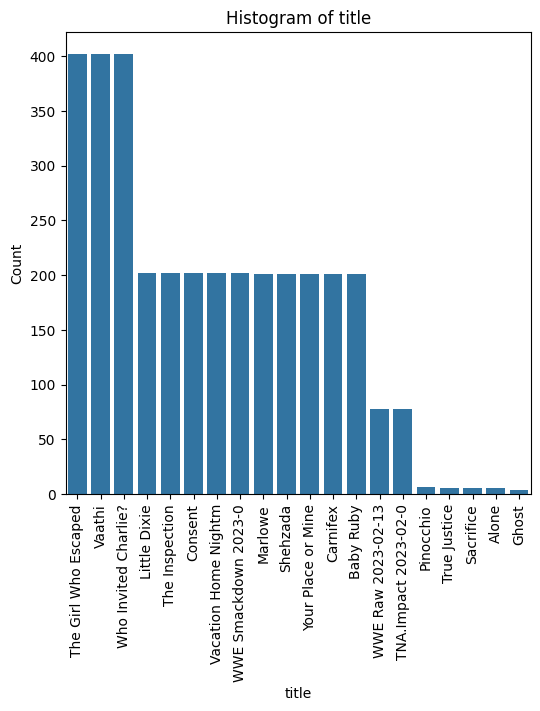

/tmp/ipykernel_2727925/1260404325.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_20_nominal_df['Value'] = top_20_nominal_df['Value'].str.slice(0, 20)


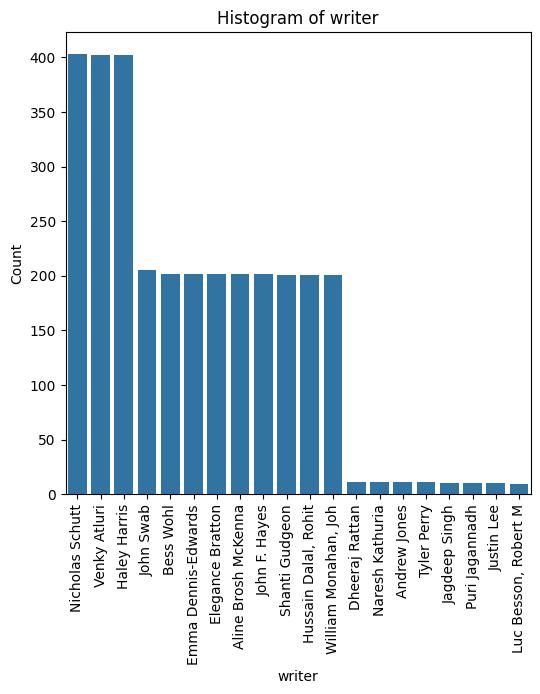

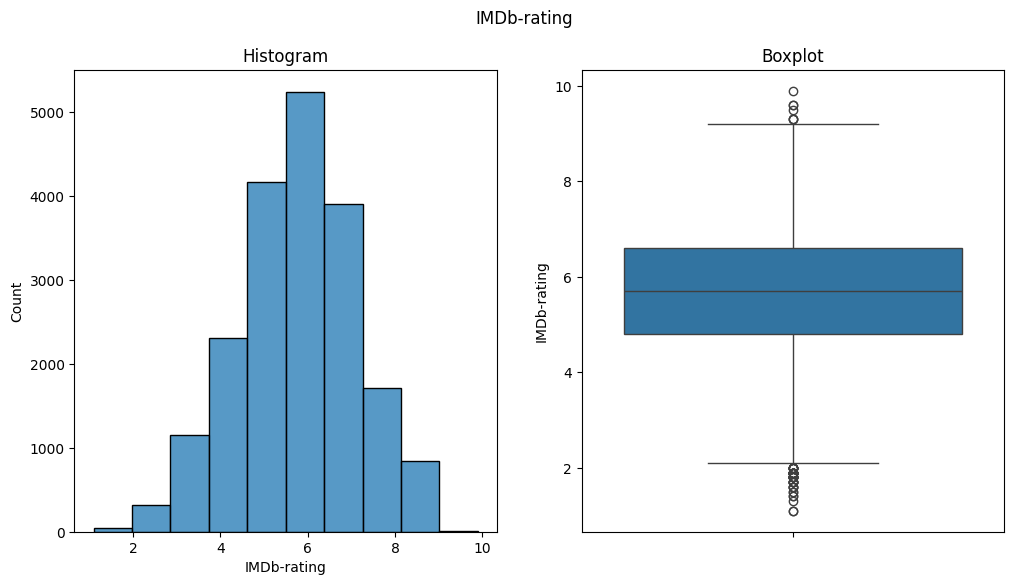

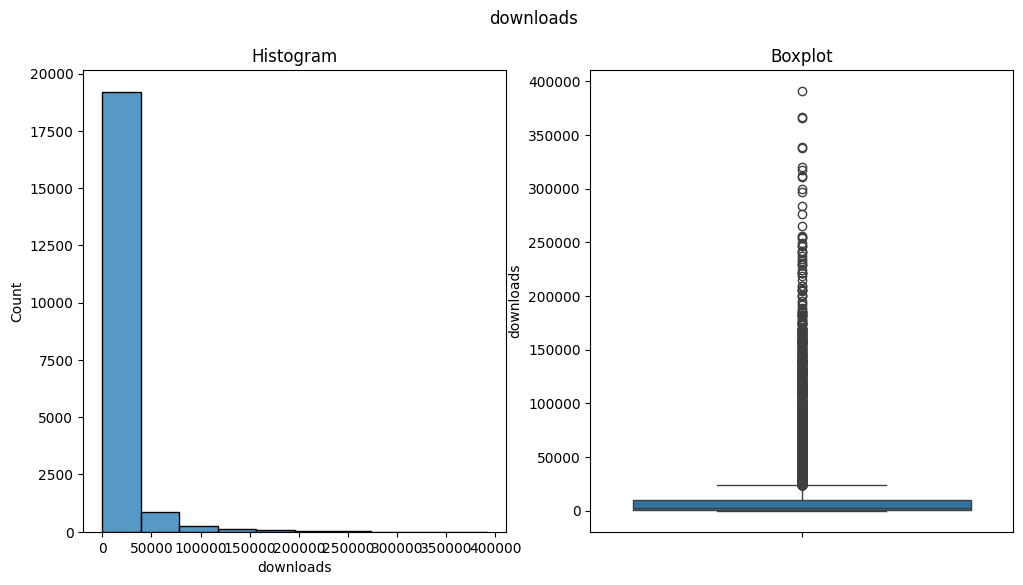

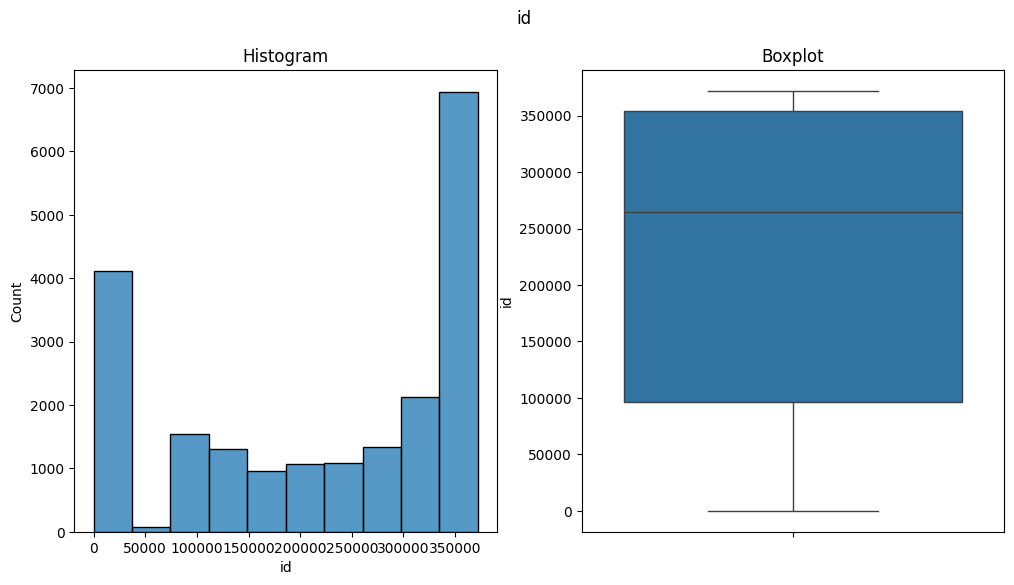

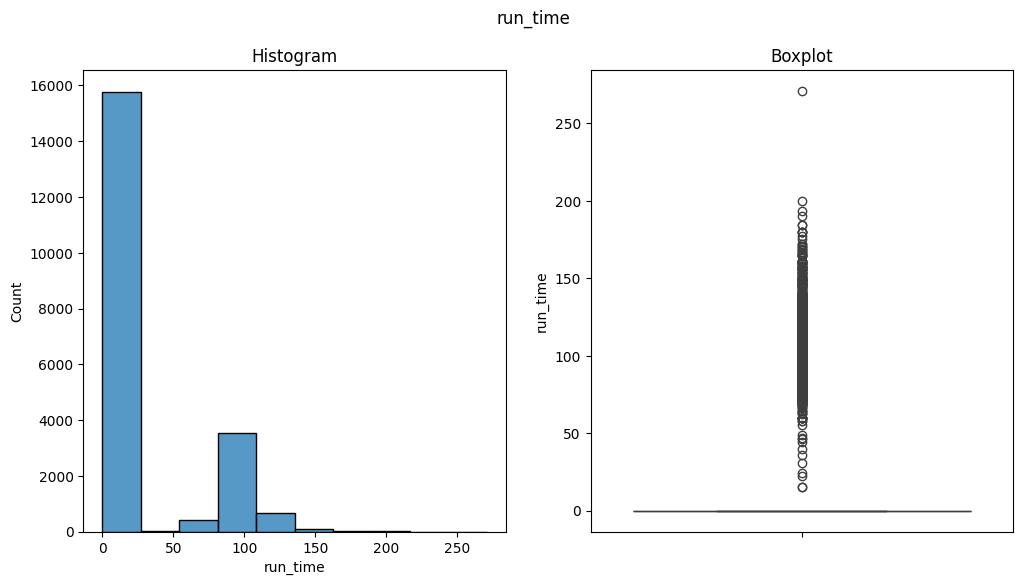

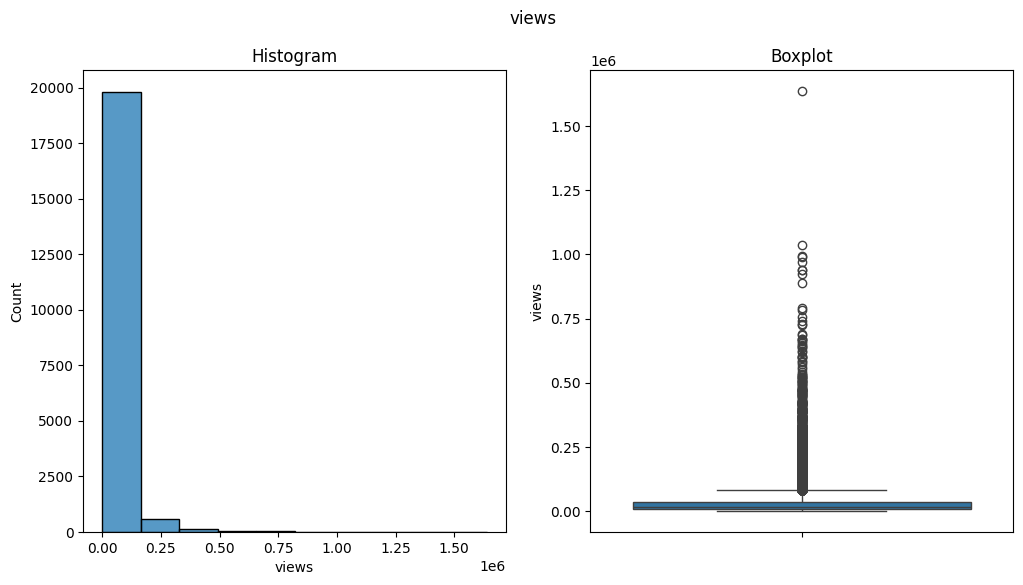

In [25]:
# 标称属性
for column, nominal_df in nominal_dfs.items():
    plt.figure(figsize=(6, 6))
    top_20_nominal_df = nominal_df.head(20)
    top_20_nominal_df['Value'] = top_20_nominal_df['Value'].str.slice(0, 20)
    sns.barplot(x='Value', y='Count', data=top_20_nominal_df)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()



# 数值属性
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

for column in numeric_columns:
    plt.figure(figsize=(12, 6))
    
    # 直方图
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], bins=10)
    plt.title('Histogram')
    
    # 盒图
    plt.subplot(1, 2, 2)
    sns.boxplot(df[column])
    plt.title('Boxplot')
    
    plt.suptitle(column)
    plt.show()

根据可视化结果，可以发现IMDb-rating列分布近似为正态分布

## 数据缺失的处理

### 缺失数据及缺失的原因

In [31]:
numeric_columns_with_missing = df.select_dtypes(include=['int64', 'float64']).columns[df.select_dtypes(include=['int64', 'float64']).isnull().any()].tolist()
for column in numeric_columns_with_missing:
    missing_count = df[column].isnull().sum()
    print(f"缺失数据的列：{column}，缺失数据量：{missing_count}")


缺失数据的列：IMDb-rating，缺失数据量：841
缺失数据的列：downloads，缺失数据量：1
缺失数据的列：views，缺失数据量：1


In [28]:
df.iloc[149]

IMDb-rating           7.1
appropriate_for       NaN
director              NaN
downloads             NaN
id                 371111
industry              NaN
language              NaN
posted_date           NaN
release_date          NaN
run_time                0
storyline             NaN
title                 NaN
views                 NaN
writer                NaN
Name: 149, dtype: object

由以上数据可知，数值属性中IMDb-rating缺失值较多，推测原因为这些电影没有人进行评价和打分；downloads和views各只缺失一个值，且都在同一行，推测原因为数据采集时的遗漏。

#### 将缺失部分剔除

In [32]:
processed_df = df.dropna()

##### 对比新旧数据集的差异

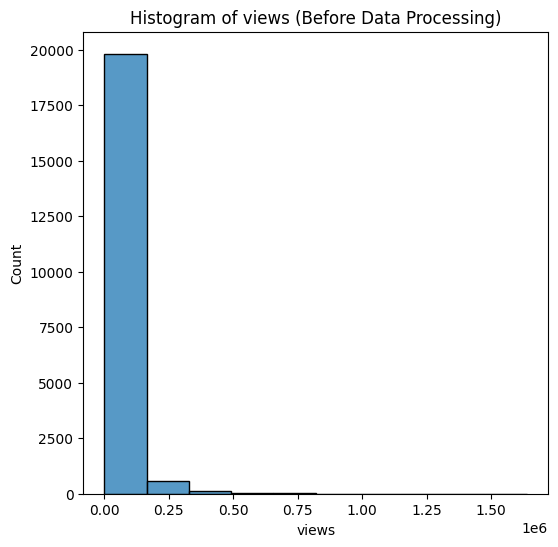

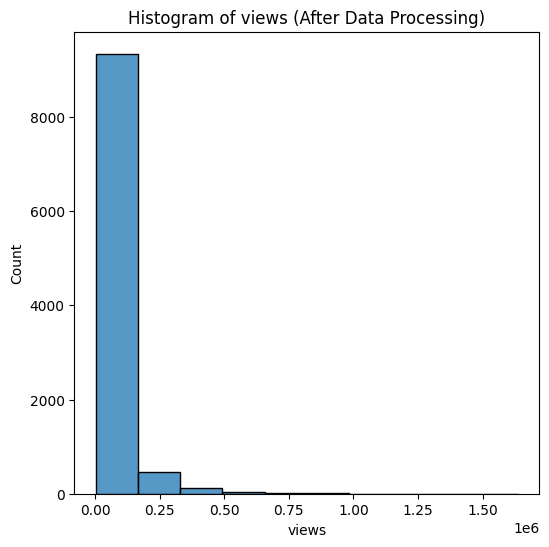

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

name = 'views'

plt.figure(figsize=(6, 6))
sns.histplot(df[name], bins=10)
plt.title(f'Histogram of {name} (Before Data Processing)')
plt.xlabel(name)
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(6, 6))
sns.histplot(processed_df[name], bins=10)
plt.title(f'Histogram of {name} (After Data Processing)')
plt.xlabel(name)
plt.ylabel('Count')
plt.show()


以views列为例，可知删除缺失数据后views接近0的数据减少较多，说明IMDb-rating列的大部分缺失可能是评论数较少导致的。

#### 用最高频率值来填补缺失值

In [34]:
processed_df = df.fillna(df.mode().iloc[0])

##### 对比新旧数据集的差异

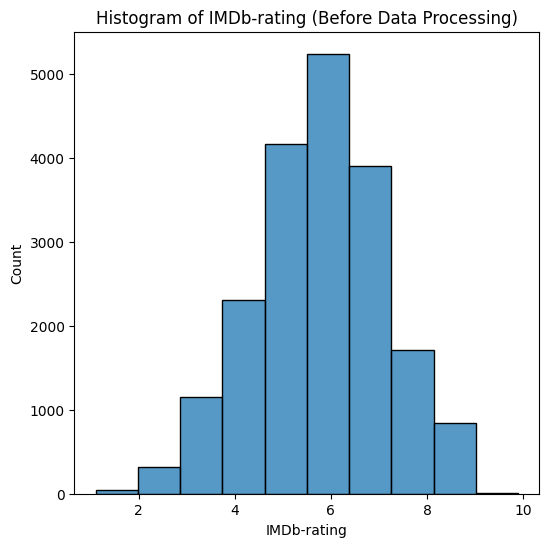

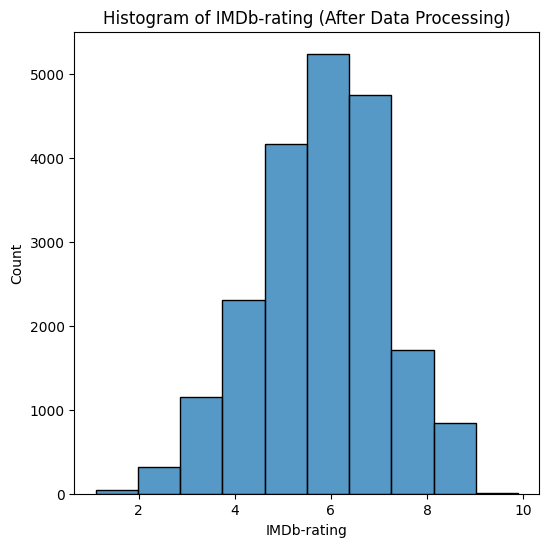

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

name = 'IMDb-rating'

plt.figure(figsize=(6, 6))
sns.histplot(df[name], bins=10)
plt.title(f'Histogram of {name} (Before Data Processing)')
plt.xlabel(name)
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(6, 6))
sns.histplot(processed_df[name], bins=10)
plt.title(f'Histogram of {name} (After Data Processing)')
plt.xlabel(name)
plt.ylabel('Count')
plt.show()


可知，IMDb-rating的众数出现在7左右，导致填充后IMDb-rating为7左右的数据增多。

#### 通过属性的相关关系来填补缺失值

计算各列之间的相似度，依次使用相似度由高到低的其他列进行线性回归从而补全缺失数据

In [37]:
from sklearn.linear_model import LinearRegression
numeric_df = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_df.corr()
numeric_columns_with_missing = numeric_df.columns[numeric_df.isnull().any()].tolist()

for column in numeric_columns_with_missing:
    correlated_columns = correlation_matrix[column].sort_values(ascending=False).index[1:]
    
    for correlated_column in correlated_columns:
        if numeric_df[column].isnull().sum() == 0:
            break
        model = LinearRegression()
    
        train_data = numeric_df[numeric_df[column].notnull() & numeric_df[correlated_column].notnull()]
        model.fit(train_data[[correlated_column]], train_data[column])
        
        missing_data = numeric_df[numeric_df[column].isnull() & numeric_df[correlated_column].notnull()]
        
        if missing_data.empty: continue
        
        predictions = model.predict(missing_data[[correlated_column]])
        numeric_df.loc[numeric_df[column].isnull(), column] = predictions
processed_df = pd.concat([df.drop(numeric_df.columns, axis=1), numeric_df], axis=1)

##### 对比新旧数据集的差异

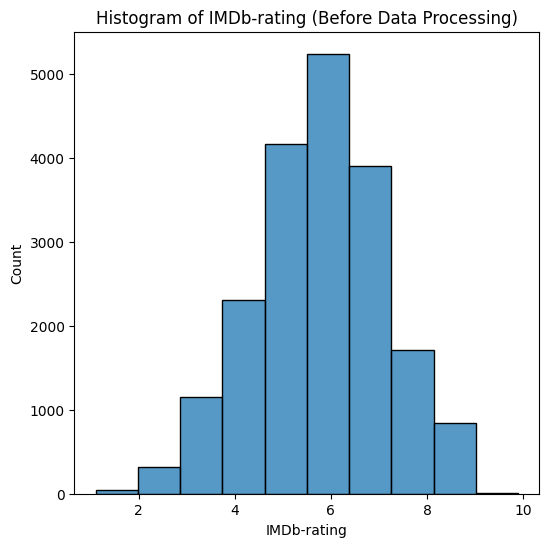

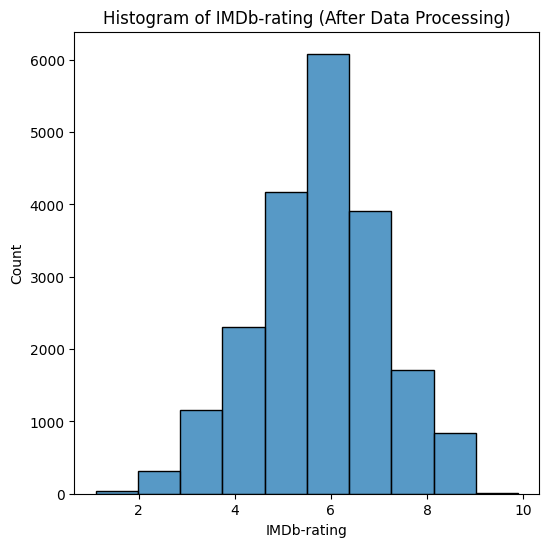

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

name = 'IMDb-rating'

plt.figure(figsize=(6, 6))
sns.histplot(df[name], bins=10)
plt.title(f'Histogram of {name} (Before Data Processing)')
plt.xlabel(name)
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(6, 6))
sns.histplot(processed_df[name], bins=10)
plt.title(f'Histogram of {name} (After Data Processing)')
plt.xlabel(name)
plt.ylabel('Count')
plt.show()


可知，填充缺失值后评分为6左右的数据增加较多。

#### 通过数据对象之间的相似性来填补缺失值

使用KNN，选取与缺失数据对象最相似的前5个对象的数据的平均值进行填充

In [43]:
from sklearn.impute import KNNImputer
import pandas as pd
numeric_df = df.select_dtypes(include=['int64', 'float64'])


imputer = KNNImputer(n_neighbors=5)
processed_df = imputer.fit_transform(numeric_df)
processed_df = pd.DataFrame(processed_df, columns=numeric_df.columns)

##### 对比新旧数据集的差异

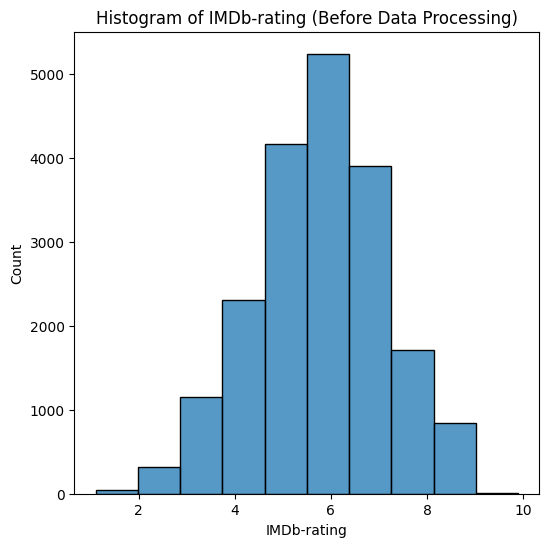

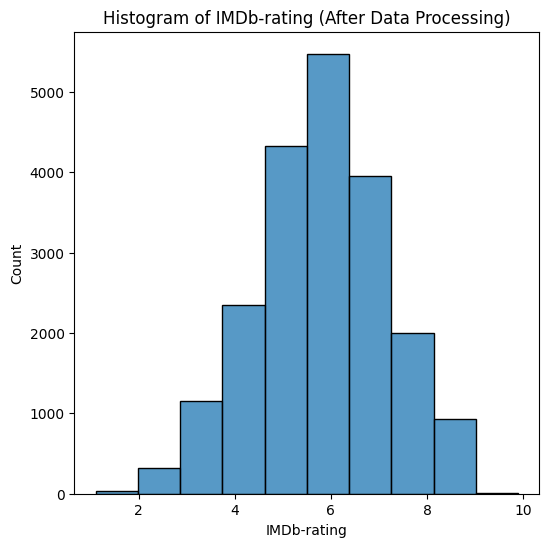

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

name = 'IMDb-rating'

plt.figure(figsize=(6, 6))
sns.histplot(df[name], bins=10)
plt.title(f'Histogram of {name} (Before Data Processing)')
plt.xlabel(name)
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(6, 6))
sns.histplot(processed_df[name], bins=10)
plt.title(f'Histogram of {name} (After Data Processing)')
plt.xlabel(name)
plt.ylabel('Count')
plt.show()


可知，数据缺失处理前后IMDb-rating的分布基本不变。